In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline


# A Gentle Introduction to ``torch.autograd``

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a conceptual
understanding of how autograd helps a neural network train.

## Background
Neural networks (NNs) are a collection of nested functions that are
executed on some input data. These functions are defined by *parameters*
(consisting of weights and biases), which in PyTorch are stored in
tensors.

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess
about the correct output. It runs the input data through each of its
functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters
proportionate to the error in its guess. It does this by traversing
backwards from the output, collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), and optimizing
the parameters using gradient descent. For a more detailed walkthrough
of backprop, check out this [video from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8)_.




## Usage in PyTorch
Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, and height & width of 64,
and its corresponding ``label`` initialized to some random values. Label in pretrained models has
shape (1,1000).

<div class="alert alert-info"><h4>Note</h4><p>This tutorial works only on the CPU and will not work on GPU devices (even if tensors are moved to CUDA).</p></div>


In [2]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

/home/nordin/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/nordin/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:14<00:00, 3.20MB/s]


This code imports the `torch` library and the `resnet18` function from the `torchvision.models` module. It also imports the `ResNet18_Weights` class from the same module.

The `resnet18` function creates a ResNet-18 model, which is a popular deep neural network architecture used for image classification tasks. The `weights` argument is set to `ResNet18_Weights.DEFAULT`, which specifies that the model should be initialized with pre-trained weights.

The `data` tensor is created using the `torch.rand` function, which generates a random tensor of the specified shape. In this case, the tensor has a shape of `(1, 3, 64, 64)`, which corresponds to a single RGB image with dimensions 64x64.

The `labels` tensor is also created using the `torch.rand` function, and has a shape of `(1, 1000)`. This tensor represents the ground-truth labels for the input image, where each element corresponds to the probability of the image belonging to a particular class.

After executing this code, you can use the ResNet-18 model to make predictions on the input image by passing the `data` tensor through the model.

Next, we run the input data through the model through each of its layers to make a prediction.
This is the **forward pass**.




In [3]:
prediction = model(data) # forward pass

This code performs a forward pass through the ResNet-18 model with the input `data` tensor, and assigns the output to the `prediction` variable.

The `model` object is an instance of the ResNet-18 model created using the `resnet18` function. The `data` tensor represents a single RGB image with dimensions 64x64.

During the forward pass, the input `data` tensor is passed through the layers of the ResNet-18 model, and the output is computed. The output tensor has a shape of `(1, 1000)`, which corresponds to the predicted probabilities for each of the 1000 classes in the ImageNet dataset.

After executing this code, the `prediction` tensor contains the predicted probabilities for each class, and can be used to make predictions on other input images.

We use the model's prediction and the corresponding label to calculate the error (``loss``).
The next step is to backpropagate this error through the network.
Backward propagation is kicked off when we call ``.backward()`` on the error tensor.
Autograd then calculates and stores the gradients for each model parameter in the parameter's ``.grad`` attribute.




In [4]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

This code computes the loss between the predicted probabilities in `prediction` and the ground-truth labels in `labels`, and performs a backward pass through the ResNet-18 model to compute the gradients of the loss with respect to the model parameters.

The loss is computed as the sum of the differences between the predicted probabilities and the ground-truth labels. This is a common loss function used for multi-class classification tasks, and is known as the *cross-entropy* loss.

$\rightarrow$ The term "cross-entropy" comes from information theory. In information theory, the cross-entropy between two probability distributions and over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution, rather than the true distribution

After computing the loss, the `backward` method is called on the loss tensor to perform the backward pass. During the backward pass, the gradients of the loss with respect to the model parameters are computed using automatic differentiation, which is provided by the `autograd` module in PyTorch.

The gradients are stored in the `grad` attribute of each parameter tensor in the model, and can be used to update the parameters during training using an optimization algorithm such as stochastic gradient descent (SGD).

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and [momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d)_ of 0.9.
We register all the parameters of the model in the optimizer.




In [5]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

This code creates an instance of the stochastic gradient descent (SGD) optimizer, which is used to update the parameters of the ResNet-18 model during training.

The `torch.optim.SGD` function is used to create the optimizer, and takes two arguments:
- `model.parameters()`: This is a generator that yields the parameters of the ResNet-18 model. The optimizer will update these parameters during training.
- `lr=1e-2`: This is the learning rate of the optimizer, which controls the step size of the parameter updates. A higher learning rate will result in larger updates, while a lower learning rate will result in smaller updates.
- `momentum=0.9`: This is the momentum parameter of the optimizer, which controls the amount of momentum to use when updating the parameters. A higher momentum will result in larger updates that are more consistent across iterations, while a lower momentum will result in smaller updates that are more sensitive to the current gradient.

After creating the optimizer, you can use it to update the parameters of the model during training by calling its `step` method after each forward and backward pass. The optimizer will use the gradients computed during the backward pass to update the parameters according to the specified learning rate and momentum.

Finally, we call ``.step()`` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in ``.grad``.




In [6]:
optim.step() #gradient descent

This code performs a gradient descent step using the optimizer created in the previous code block.

The `step` method of the optimizer is called to update the parameters of the ResNet-18 model using the gradients computed during the backward pass. The optimizer uses the learning rate and momentum specified during its creation to determine the size and direction of the parameter updates.

After calling `step`, the parameters of the model will be updated, and can be used to make predictions on new input data during the next forward pass. This process of forward and backward passes, followed by parameter updates, is repeated iteratively during training to minimize the loss and improve the accuracy of the model.

At this point, you have everything you need to train your neural network.
The below sections detail the workings of autograd - feel free to skip them.




--------------




## Differentiation in Autograd
Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.




In [7]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}



In [8]:
Q = 3*a**3 - b**2

Let's assume ``a`` and ``b`` to be parameters of an NN, and ``Q``
to be the error. In NN training, we want gradients of the error
w.r.t. parameters, i.e.

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}


When we call ``.backward()`` on ``Q``, autograd calculates these gradients
and stores them in the respective tensors' ``.grad`` attribute.

We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` because it is a vector.
``gradient`` is a tensor of the same shape as ``Q``, and it represents the
gradient of Q w.r.t. itself, i.e.

\begin{align}\frac{dQ}{dQ} = 1\end{align}

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like ``Q.sum().backward()``.




In [9]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

Gradients are now deposited in ``a.grad`` and ``b.grad``



In [10]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Optional Reading - Vector Calculus using ``autograd``

Mathematically, if you have a vector valued function
$\vec{y}=f(\vec{x})$, then the gradient of $\vec{y}$ with
respect to $\vec{x}$ is a Jacobian matrix $J$:

$
\begin{align}J
     =
      \left(\begin{array}{cc}
      \frac{\partial \bf{y}}{\partial x_{1}} &
      ... &
      \frac{\partial \bf{y}}{\partial x_{n}}
      \end{array}\right)
     =
     \left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}
$

Generally speaking, ``torch.autograd`` is an engine for computing
vector-Jacobian product. That is, given any vector $\vec{v}$, compute the product
$J^{T}\cdot \vec{v}$

If $\vec{v}$ happens to be the gradient of a scalar function $l=g\left(\vec{y}\right)$:

$
\begin{align}\vec{v} =
   \left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}\end{align}
$

then by the chain rule, the vector-Jacobian product would be the
gradient of $l$ with respect to $\vec{x}$:

$
\begin{align}J^{T}\cdot \vec{v}=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\left(\begin{array}{c}
      \frac{\partial l}{\partial y_{1}}\\
      \vdots\\
      \frac{\partial l}{\partial y_{m}}
      \end{array}\right)=\left(\begin{array}{c}
      \frac{\partial l}{\partial x_{1}}\\
      \vdots\\
      \frac{\partial l}{\partial x_{n}}
      \end{array}\right)\end{align}
$

This characteristic of vector-Jacobian product is what we use in the above example;
``external_grad`` represents $\vec{v}$.


## Computational Graph

Conceptually, autograd keeps a record of data (tensors) & all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)_
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor, and
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when ``.backward()`` is called on the DAG
root. ``autograd`` then:

- computes the gradients from each ``.grad_fn``,
- accumulates them in the respective tensor’s ``.grad`` attribute, and
- using the chain rule, propagates all the way to the leaf tensors.

Below is a visual representation of the DAG in our example. In the graph,
the arrows are in the direction of the forward pass. The nodes represent the backward functions
of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors ``a`` and ``b``.

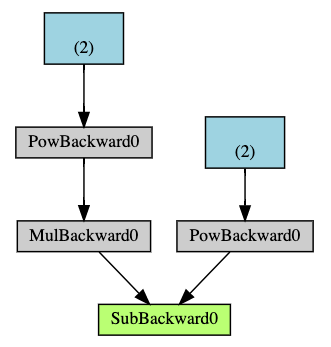

<div class="alert alert-info"><h4>Note</h4><p>**DAGs are dynamic in PyTorch**
  An important thing to note is that the graph is recreated from scratch; after each
  ``.backward()`` call, autograd starts populating a new graph. This is
  exactly what allows you to use control flow statements in your model;
  you can change the shape, size and operations at every iteration if
  needed.</p></div>

### Exclusion from the DAG

``torch.autograd`` tracks operations on all tensors which have their
``requires_grad`` flag set to ``True``. For tensors that don’t require
gradients, setting this attribute to ``False`` excludes it from the
gradient computation DAG.

The output tensor of an operation will require gradients even if only a
single input tensor has ``requires_grad=True``.




In [12]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In a NN, parameters that don't compute gradients are usually called **frozen parameters**.
It is useful to "freeze" part of your model if you know in advance that you won't need the gradients of those parameters
(this offers some performance benefits by reducing autograd computations).

In fine-tuning, we freeze most of the model and typically only modify the classifier layers to make predictions on new labels.
Let's walk through a small example to demonstrate this. As before, we load a pretrained resnet18 model, and freeze all the parameters.



In [14]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

Let's say we want to fine-tune the model on a new dataset with 10 labels.
In resnet, the classifier is the last linear layer ``model.fc``.
We can simply replace it with a new linear layer (unfrozen by default)
that acts as our classifier.



In [15]:
model.fc = nn.Linear(512, 10)

Now all parameters in the model, except the parameters of ``model.fc``, are frozen.
The only parameters that compute gradients are the weights and bias of ``model.fc``.



In [16]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Notice although we register all the parameters in the optimizer,
the only parameters that are computing gradients (and hence updated in gradient descent)
are the weights and bias of the classifier.

The same exclusionary functionality is available as a context manager in
[torch.no_grad()](https://pytorch.org/docs/stable/generated/torch.no_grad.html)_




--------------




## Further readings:

-  [In-place operations & Multithreaded Autograd](https://pytorch.org/docs/stable/notes/autograd.html)_
-  [Example implementation of reverse-mode autodiff](https://colab.research.google.com/drive/1VpeE6UvEPRz9HmsHh1KS0XxXjYu533EC)_

